1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

X: (3, 1000)
[ 2.72008962e+01+0.j -7.57658933e-16+0.j  1.93224371e+00+0.j]
[[-0.11705241 -0.81649658  0.56536012]
 [-0.57536949 -0.40824829 -0.70871947]
 [-0.80947432  0.40824829  0.42200078]]
l_est: [ 2.72008962e+01  1.93224371e+00 -4.99455779e-15]
[[-0.11705241  0.56536012 -0.81649658]
 [-0.57536949 -0.70871947 -0.40824829]
 [-0.80947432  0.42200078  0.40824829]]
[7.57658933e-16 1.93224371e+00 2.72008962e+01]
1.0


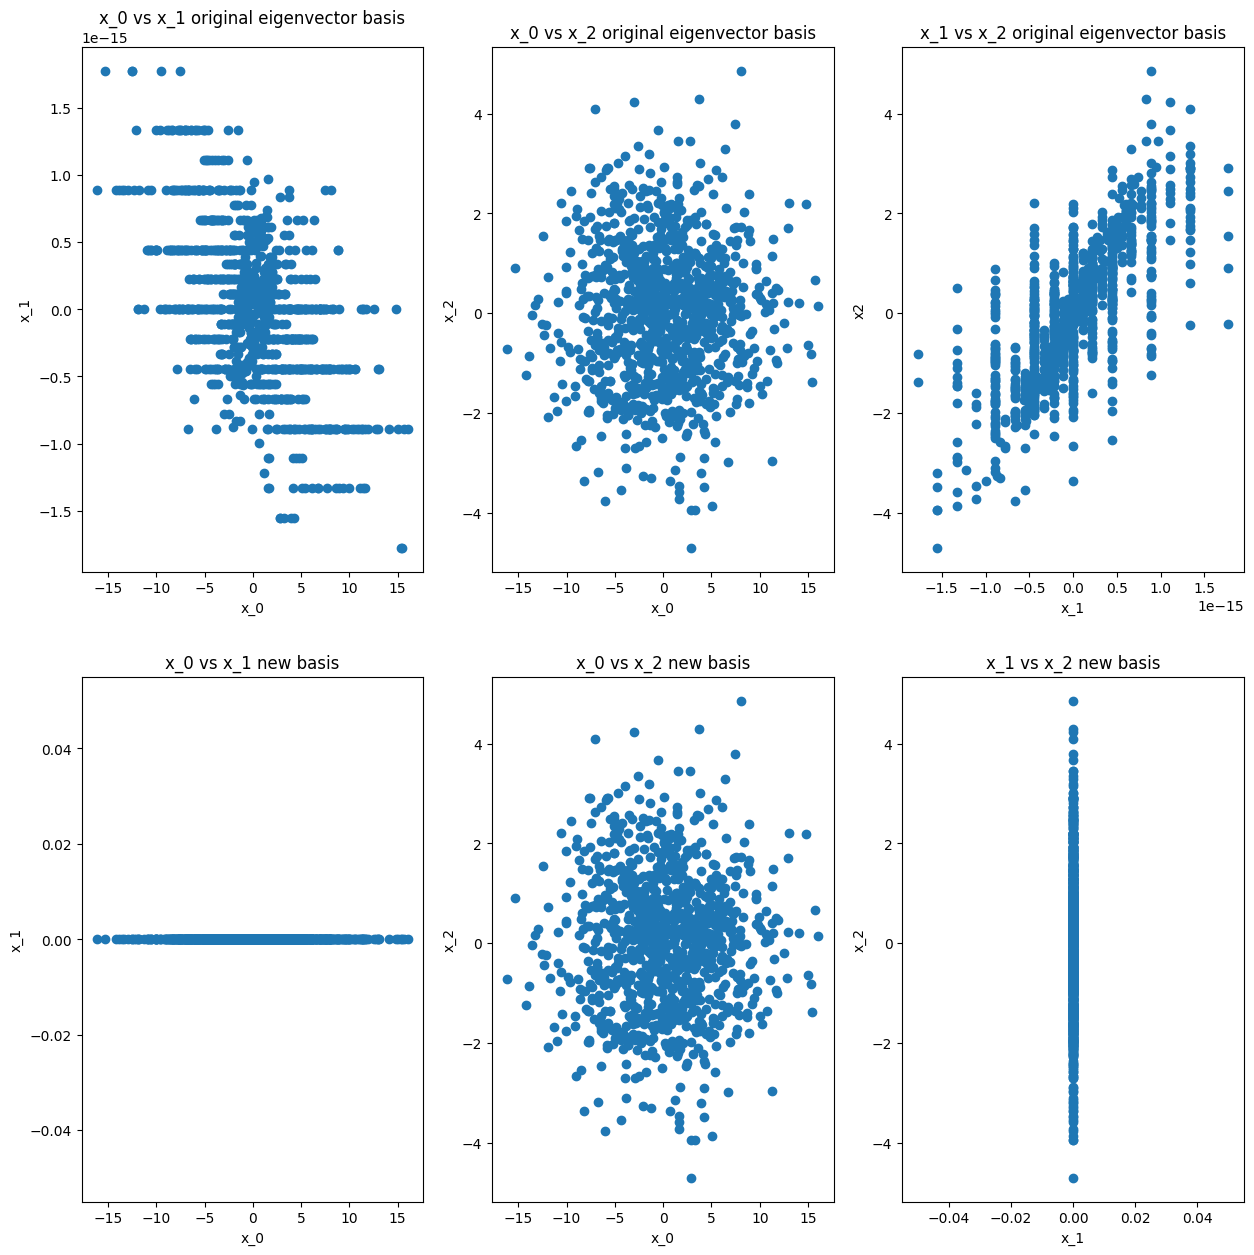

In [5]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt
N = 1000 # size
mu1, sigma1 = 0, 1# mean and standard deviation
x1 = np.random.normal(mu1, sigma1, N)
mu2, sigma2 = 0, 3# mean and standard deviation
x2 = x1 + np.random.normal(mu2, sigma2, N)
x3 = 2*x1 + x2
# create a matrix with the three vectors
X = np.array([x1,x2, x3])
print("X:", X.shape)
#Find the covariance matrix from the samples
cov = np.cov(X)
#print(cov)
# Compute using eignevalues
l, V = la.eig(cov)
print(l)
print(V)
# Compute using svd
U, s, Vt = la.svd(cov)
# Estimate eigenvalues
l_est = np.matmul(s, (np.matmul(Vt ,U))) # Can be proven
print("l_est:",l_est)
print(U)
# As we can find:
# V = U
# l = s*Vt*U

# 
l = abs(l)
l_ord = np.sort(l)
print(l_ord)
variability = abs((l_ord[2]+l_ord[1])/l_ord.sum())
print(variability)
#That's make sense due to the enormous difference between values
# We just need to delete the 1 eigenvector, the once associated to the smallest eigenvalue

toDel = np.argmin(l)
V_mod = np.copy(V)
V_mod[:3, toDel] = 0
out = np.dot(X.T, V_mod)
X = np.dot(X.T, V)

x1 = X[:, 0]
x2 = X[:, 1]
x3 = X[:, 2]

o1 = out[:, 0]
o2 = out[:, 1]
o3 = out[:, 2]

# Print
fig, axs= plt.subplots(2, 3,figsize=(15, 15))
axs[0, 0].scatter(x1, x2)
axs[0, 0].set_title("x_0 vs x_1 original eigenvector basis")
axs[0, 0].set_xlabel("x_0")
axs[0, 0].set_ylabel("x_1")
axs[0, 1].scatter(x1, x3)
axs[0, 1].set_title("x_0 vs x_2 original eigenvector basis")
axs[0, 1].set_xlabel("x_0")
axs[0, 1].set_ylabel("x_2")
axs[0, 2].scatter(x2, x3)
axs[0, 2].set_title("x_1 vs x_2 original eigenvector basis")
axs[0, 2].set_xlabel("x_1")
axs[0, 2].set_ylabel("x2")

axs[1, 0].scatter(o1, o2)
axs[1, 0].set_title("x_0 vs x_1 new basis")
axs[1, 0].set_xlabel("x_0")
axs[1, 0].set_ylabel("x_1")
axs[1, 1].scatter(o1, o3)
axs[1, 1].set_title("x_0 vs x_2 new basis")
axs[1, 1].set_xlabel("x_0")
axs[1, 1].set_ylabel("x_2")
axs[1, 2].scatter(o2, o3)
axs[1, 2].set_title("x_1 vs x_2 new basis")
axs[1, 2].set_xlabel("x_1")
axs[1, 2].set_ylabel("x_2")
plt.show()



2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

The Variability is:  1.0


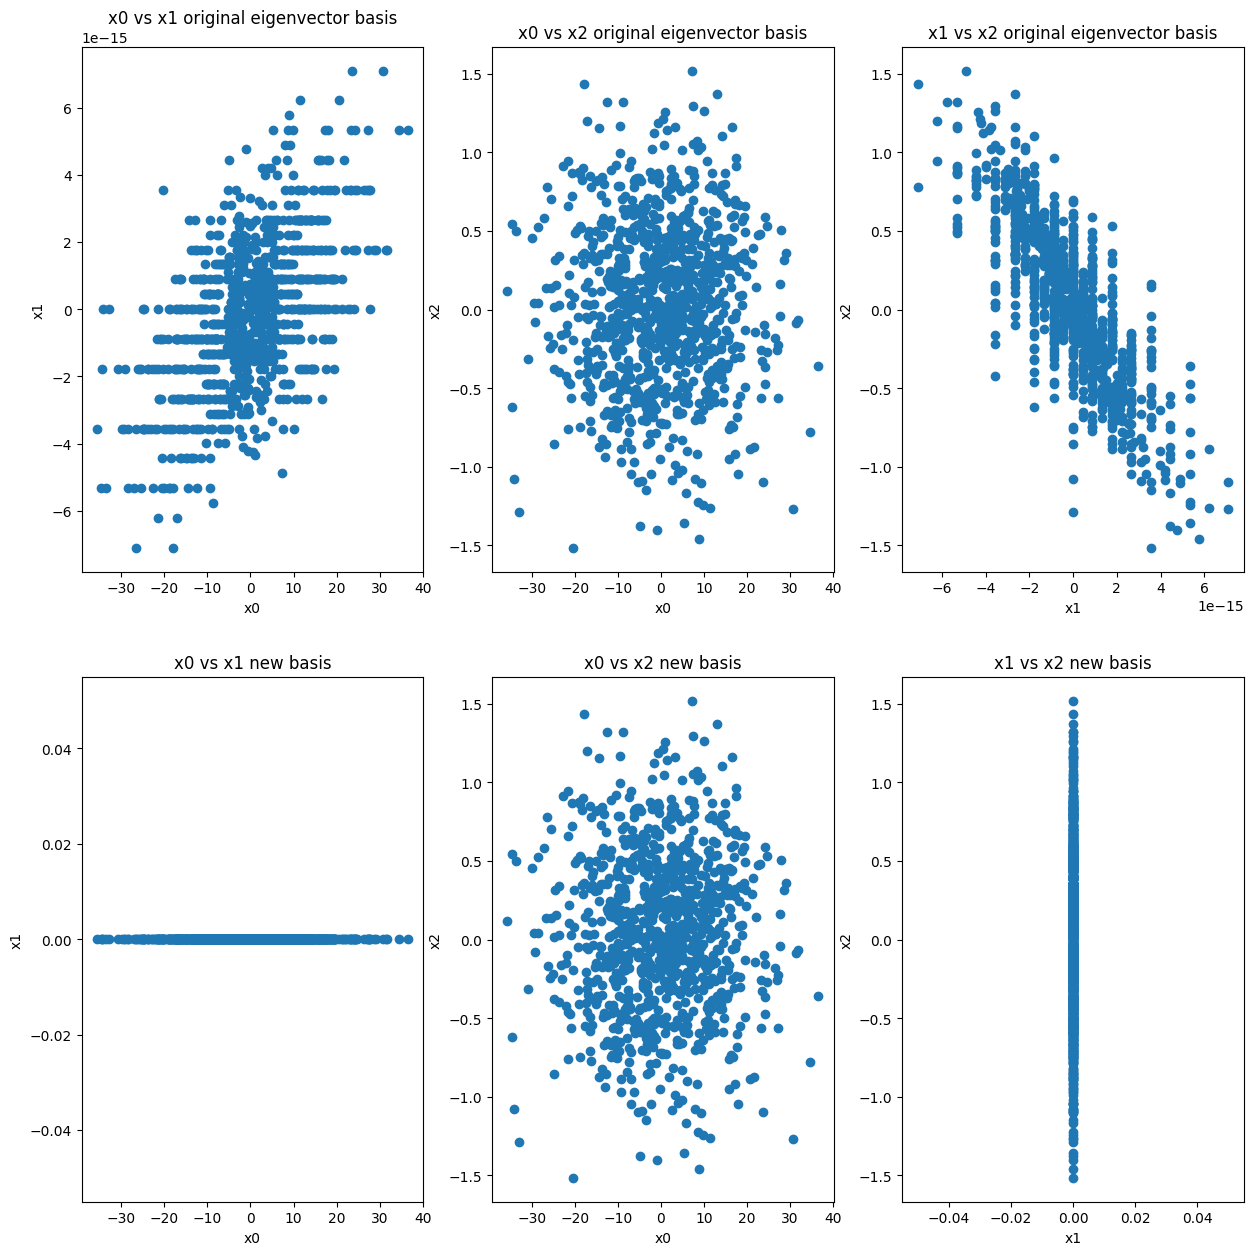

In [6]:
N = (1000, 10) # size
mu1N, sigma1N = mu1, sigma1/20# mean and standard deviation
w1 = np.random.normal(mu1N, sigma1N, N)
w1 = w1.sum(axis = 1)
x1 = x1 + w1

N = (1000, 10) # size
mu2N, sigma2N = mu2, sigma2/20# mean and standard deviation
w2 = np.random.normal(mu2N, sigma2N, N)
w2 = w2.sum(axis = 1)
x2 = x2 + w2

x3 = 2*x1 + x2

# Now repeat the code presented before
X = np.array([x1,x2, x3])
cov = np.cov(X)
l, V = la.eig(cov)

l = abs(l)
l_ord = np.sort(l)
variability = abs((l_ord[2]+l_ord[1])/l_ord.sum())
print("The Variability is: ", variability)

toDel = np.argmin(l)
V_mod = np.copy(V)
V_mod[:3, toDel] = 0
out = np.dot(X.T, V_mod)
X = np.dot(X.T, V)

x1 = X[:, 0]
x2 = X[:, 1]
x3 = X[:, 2]

o1 = out[:, 0]
o2 = out[:, 1]
o3 = out[:, 2]


fig, axs= plt.subplots(2, 3,figsize=(15, 15))
axs[0, 0].scatter(x1, x2)
axs[0, 0].set_title("x0 vs x1 original eigenvector basis")
axs[0, 0].set_xlabel("x0")
axs[0, 0].set_ylabel("x1")
axs[0, 1].scatter(x1, x3)
axs[0, 1].set_title("x0 vs x2 original eigenvector basis")
axs[0, 1].set_xlabel("x0")
axs[0, 1].set_ylabel("x2")
axs[0, 2].scatter(x2, x3)
axs[0, 2].set_title("x1 vs x2 original eigenvector basis")
axs[0, 2].set_xlabel("x1")
axs[0, 2].set_ylabel("x2")

axs[1, 0].scatter(o1, o2)
axs[1, 0].set_title("x0 vs x1 new basis")
axs[1, 0].set_xlabel("x0")
axs[1, 0].set_ylabel("x1")
axs[1, 1].scatter(o1, o3)
axs[1, 1].set_title("x0 vs x2 new basis")
axs[1, 1].set_xlabel("x0")
axs[1, 1].set_ylabel("x2")
axs[1, 2].scatter(o2, o3)
axs[1, 2].set_title("x1 vs x2 new basis")
axs[1, 2].set_xlabel("x1")
axs[1, 2].set_ylabel("x2")
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [7]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [10]:
data = pd.read_csv("data/magic04.data", header=None)
data = data.drop(columns=[10])
display(data)

# SVD decomposition on datas
U, S, Vt = np.linalg.svd(data)

# Eigenvalues
l = S**2/(-1) 
V = U
print("\nThe eigenvalues are:\n", l)
print("\nThe eigenvectors are:\n", V)

#Perform PCA
l_sum = l.sum()

for i in range(data.shape[1]):
    print("By selecting the component %d, we retain %.2f%% of the total variability" % (i,((l[i]/l_sum)*100)))

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166



The eigenvalues are:
 [-9.07984944e+08 -7.98524370e+07 -3.96456019e+07 -2.54590815e+07
 -1.56229664e+07 -8.24791214e+06 -2.23211211e+06 -1.07288186e+04
 -6.62914518e+02 -8.03812118e+00]

The eigenvectors are:
 [[-3.03239936e-03 -3.58932705e-03  8.45817849e-04 ... -8.20996315e-03
  -1.28599398e-02 -1.97295965e-02]
 [-6.80776740e-03 -4.93168598e-03  8.93506042e-04 ...  1.12988341e-02
   1.79290324e-02 -1.18726695e-02]
 [-1.00144095e-02 -3.78153851e-03  2.13679760e-02 ... -3.87890932e-04
  -8.99605080e-03 -1.28865116e-02]
 ...
 [-9.10740061e-03 -1.62275473e-03 -3.51827734e-03 ...  9.99671590e-01
  -4.27057217e-04  1.39714689e-04]
 [-1.43559247e-02  4.78057046e-03  1.80811955e-02 ... -4.37283224e-04
   9.97991209e-01 -7.82847471e-05]
 [-1.06045893e-02  2.77433781e-02  1.12912403e-02 ...  1.37450466e-04
  -9.91712402e-05  9.98563967e-01]]
By selecting the component 0, we retain 84.15% of the total variability
By selecting the component 1, we retain 7.40% of the total variability
By selecti